# 3.6 Predicting house prices: a regression example

## 3.6.1 The Boston Housing Price dataset

- we have to predict price
- boston housing mid-1970
- 506 data samples
- 404 training and 102 testing samples
- 13 Features (number of columns in X)

In [1]:
404/506*100

79.84189723320159

In [2]:
506*80/100

404.8

#### Listing 3.24 Loading the Boston housing dataset

In [4]:
from tensorflow.keras.datasets import boston_housing
(train_data, train_targets), (test_data, test_targets) = boston_housing.load_data()


In [5]:
train_data.shape

(404, 13)

In [6]:
test_data.shape

(102, 13)

In [12]:
train_data[0]

array([  1.23247,   0.     ,   8.14   ,   0.     ,   0.538  ,   6.142  ,
        91.7    ,   3.9769 ,   4.     , 307.     ,  21.     , 396.9    ,
        18.72   ])

In [10]:
train_targets[0]

15.2

### 3.6.2 Preparing the data

#### Listing 3.25 Normalizing the data

In [15]:
mean = train_data.mean(axis=0)
train_data -= mean

std = train_data.std(axis=0)

train_data /= std
test_data -= mean
test_data /= std

In [16]:
mean

array([ 7.83201886e-18,  7.36484581e-17,  1.48396147e-17,  1.18991725e-16,
        5.60607666e-17, -3.11906716e-17,  1.09923072e-17,  6.48546123e-17,
        1.95113452e-17, -7.69461502e-17, -2.85799987e-17,  3.89539885e-17,
       -1.20915379e-17])

In [17]:
std

array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.])

In [18]:
train_data[0]

array([-0.27224633, -0.48361547, -0.43576161, -0.25683275, -0.1652266 ,
       -0.1764426 ,  0.81306188,  0.1166983 , -0.62624905, -0.59517003,
        1.14850044,  0.44807713,  0.8252202 ])

In [29]:
np.array(train_data.mean(axis=0),dtype=np.int8)

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], dtype=int8)

In [19]:
(21 - 1.84759901e+01)/2.19765689e+00

1.1485004376638608

In [20]:
train_data.std(axis=0)

array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.])

In [26]:
import numpy as np
np.mean(train_data, axis=0)

array([ 7.83201886e-18, -1.20915379e-17,  6.32057663e-17, -4.16608442e-16,
        4.39692287e-18,  7.41980734e-18,  1.09923072e-17, -1.09923072e-18,
       -3.57249983e-18, -3.21524985e-17,  4.45188441e-17, -1.00304803e-17,
       -1.20915379e-17])

#### 3.6.3 Building your network

In [30]:
from tensorflow.keras import models
from tensorflow.keras import layers

def build_model():
    model = models.Sequential()
    model.add(layers.Dense(64, activation='relu',
                           input_shape=(train_data.shape[1],)))
    model.add(layers.Dense(64, activation='relu'))
    model.add(layers.Dense(1))
    model.compile(optimizer='rmsprop', loss='mse', metrics=['mae'])
    return model

In [32]:
(23+31)/2

27.0

#### Listing 3.27 K-fold validation

In [34]:
import numpy as np
k=4
num_val_samples = len(train_data) // k
num_epochs = 100
all_scores = []

num_epochs = 500
all_mae_histories = []
for i in range(k):
    print('processing fold #', i)
    val_data = train_data[i * num_val_samples: (i + 1) * num_val_samples]
    val_targets = train_targets[i * num_val_samples: (i + 1) * num_val_samples]
    
    partial_train_data = np.concatenate(
        [train_data[:i * num_val_samples],
         train_data[(i + 1) * num_val_samples:]],
        axis=0)
    
    partial_train_targets = np.concatenate(
        [train_targets[:i * num_val_samples],
         train_targets[(i + 1) * num_val_samples:]],
        axis=0)
    
model = build_model()
history = model.fit(partial_train_data, partial_train_targets,
                    validation_data=(val_data, val_targets),
                    epochs=num_epochs, batch_size=1, verbose=0)
mae_history = history.history['val_mae']
all_mae_histories.append(mae_history)

processing fold # 0
processing fold # 1
processing fold # 2
processing fold # 3


In [17]:
history.history.keys()

dict_keys(['loss', 'mae', 'val_loss', 'val_mae'])

#### Listing 3.29 Building the history of successive mean K-fold validation scores

In [18]:
average_mae_history = [
np.mean([x[i] for x in all_mae_histories]) for i in range(num_epochs)]

In [19]:
average_mae_history

[5.693404197692871,
 3.969085931777954,
 3.373014211654663,
 3.249359130859375,
 3.157114267349243,
 3.0040442943573,
 2.949414014816284,
 2.7647016048431396,
 2.876683235168457,
 2.9337069988250732,
 2.74836802482605,
 2.7099180221557617,
 2.733415126800537,
 2.6246864795684814,
 2.5679659843444824,
 2.5881617069244385,
 2.534420967102051,
 2.4487953186035156,
 2.482792377471924,
 2.802041530609131,
 2.540942430496216,
 2.4541029930114746,
 2.4426214694976807,
 2.573106288909912,
 2.490983009338379,
 2.859463930130005,
 2.4958903789520264,
 2.523568630218506,
 2.51906681060791,
 2.5574049949645996,
 2.508443593978882,
 2.380169153213501,
 2.464118480682373,
 2.7025628089904785,
 2.5718233585357666,
 2.4767916202545166,
 2.4057118892669678,
 2.6610450744628906,
 2.783233642578125,
 2.420203685760498,
 2.5010714530944824,
 2.424973249435425,
 2.8942880630493164,
 2.4825453758239746,
 2.37044358253479,
 2.647359609603882,
 2.7866828441619873,
 2.3779070377349854,
 2.56620717048645,
 2.68

#### Listing 3.30 Plotting validation scores

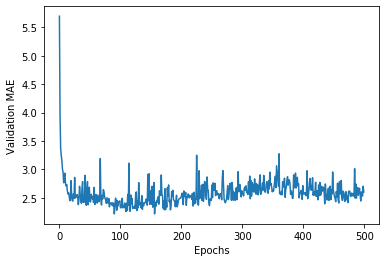

In [20]:
import matplotlib.pyplot as plt
plt.plot(average_mae_history)
plt.xlabel('Epochs')
plt.ylabel('Validation MAE')
plt.show()

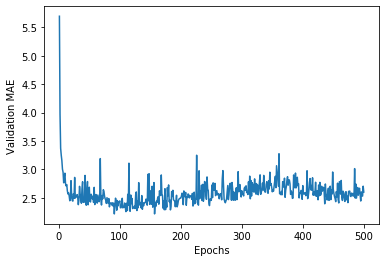

In [21]:
import matplotlib.pyplot as plt
plt.plot(range(1, len(average_mae_history) + 1), average_mae_history)
plt.xlabel('Epochs')
plt.ylabel('Validation MAE')
plt.show()

#### Listing 3.31 Plotting validation scores, excluding the first 10 data points


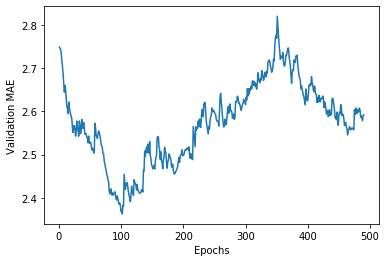

In [24]:
def smooth_curve(points, factor=0.9):
    smoothed_points = []
    for point in points:
        if smoothed_points:
            previous = smoothed_points[-1]
            smoothed_points.append(previous * factor + point * (1 - factor))
        else:
            smoothed_points.append(point)
    return smoothed_points
    
smooth_mae_history = smooth_curve(average_mae_history[10:])
plt.plot(range(1, len(smooth_mae_history) + 1), smooth_mae_history)
plt.xlabel('Epochs')
plt.ylabel('Validation MAE')
plt.show()


#### Listing 3.32 Training the final model

In [26]:
model = build_model()
model.fit(train_data, train_targets,
          epochs=100, batch_size=16, verbose=0)
test_mse_score, test_mae_score = model.evaluate(test_data, test_targets)

4/4 [==============================] - 0s 4ms/step - loss: 17.2395 - mae: 2.7132


In [27]:
test_mse_score

17.239465713500977

In [28]:
test_mae_score

2.7132461071014404

You’re still off by about $2,550.

In [29]:
model.predict(test_data)

array([[ 8.700686],
       [18.890963],
       [21.362719],
       [32.529922],
       [24.211483],
       [22.05826 ],
       [27.761366],
       [21.583105],
       [19.316132],
       [23.374973],
       [16.517637],
       [16.658096],
       [16.545847],
       [41.074883],
       [21.717382],
       [20.132326],
       [25.695456],
       [19.090677],
       [19.791704],
       [25.658064],
       [11.558103],
       [14.85916 ],
       [21.644106],
       [15.43796 ],
       [19.12347 ],
       [26.31711 ],
       [28.677176],
       [29.817461],
       [11.990912],
       [20.11735 ],
       [19.256828],
       [15.031489],
       [33.35923 ],
       [23.710217],
       [18.868574],
       [ 7.987828],
       [15.632457],
       [16.619183],
       [18.097322],
       [26.296892],
       [30.692137],
       [26.44659 ],
       [14.170518],
       [41.21086 ],
       [27.546362],
       [26.67436 ],
       [27.882223],
       [18.374252],
       [24.071993],
       [22.5086  ],
